In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [595]:
import numpy as np

class String():
    def __init__(self, velocity, array):
        self.V = velocity
        self.V2 = velocity **2
        self.velArray = np.zeros(np.shape(array)[0] - 2)
        self.accArray = np.zeros(np.shape(array)[0] - 2)
        self.array = array
        
        
    def Derivative(self, array):
        d_array = array[1:] - array[:-1]
        return d_array
    
    
    def Update(self, n_iter, updates_per_second):
        
        self.arrayMatrix = np.zeros((n_iter, self.array.shape[0]))
        self.EnergyKinetic = np.zeros((n_iter))
        self.EnergyPotential = np.zeros((n_iter))
        for i in range(n_iter):
            #print(i)
            self.accArray = self.Derivative(self.Derivative(self.array)) * self.V2 / updates_per_second
            self.velArray +=  self.accArray
            self.array[1:-1] += self.velArray / updates_per_second
            self.arrayMatrix[i] = self.array
            self.EnergyPotential[i] = np.sum(np.square((self.Derivative(self.array))))
            self.EnergyKinetic[i] = np.sum(np.square(self.velArray)) / self.V ** 2
            
        return self.arrayMatrix, self.EnergyPotential, self.EnergyKinetic

In [656]:
import numpy as np
a = np.zeros((500))

In [657]:
for i in range(int(-a.shape[0]/4), int(a.shape[0]/4)):
    a[i + int(-a.shape[0] / 4)] = -abs(i)
a = a + 25

In [658]:
for i in range(int(a.shape[0])):
    a[i] = i
a = a 

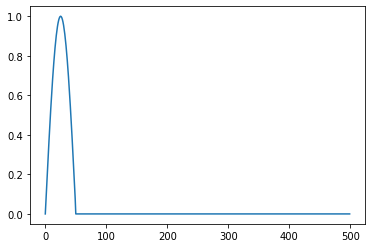

In [662]:
plt.plot(a)

In [660]:
a[:50] = np.sin(a[:50]/16)

In [661]:
a[50:] = 0

In [663]:
string = String(150, a)
StrMat, EnergyPot, EnergyKin = string.Update(5000, 500)

In [664]:
StrMat, EnergyPot, EnergyKin = string.Update(5000, 500)

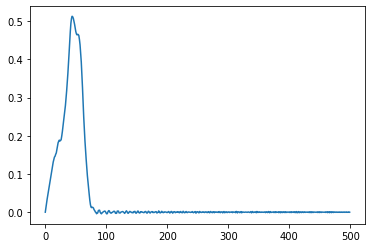

In [698]:
plt.plot(StrMat[3400])

In [630]:
StrMat.shape

(5000, 500)

In [631]:
derMin = 100000000

for i in range(- 10000, 100005):
    a = i 
    rez = EnergyKin / a + np.sqrt(EnergyPot)
    der = np.sum(abs(string.Derivative(rez)))
    if der < derMin:
        derMin = der
        amin = a

/tmp/ipykernel_26801/2622698428.py:5: RuntimeWarning: divide by zero encountered in true_divide
  rez = EnergyKin / a + np.sqrt(EnergyPot)
/tmp/ipykernel_26801/288123214.py:14: RuntimeWarning: invalid value encountered in subtract
  d_array = array[1:] - array[:-1]


In [632]:
derMin

47.03108386836041

In [633]:
amin

182

In [510]:
rez = EnergyKin / a+ EnergyPot
np.sum(abs(string.Derivative(rez)))

117.07714083882863

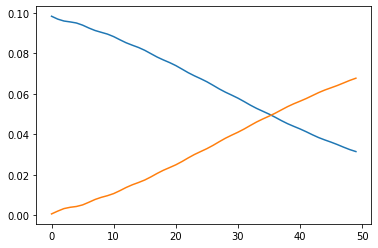

In [682]:
a = 1
plt.plot(EnergyPot[:50])
plt.plot(EnergyKin[:50])
#plt.plot(EnergyKin / a+ EnergyPot)

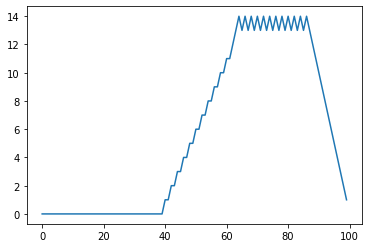

In [555]:
plt.plot(StrMat[10])

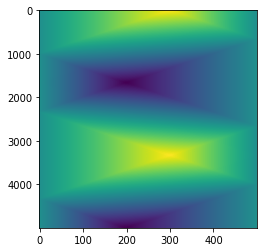

In [735]:
plt.imshow(mat, aspect=0.1)

In [731]:
def Random(shape, height):
    str = np.random.randn(shape) * height
    str[0] = 0
    str[-1] = 0
    return str
def Sinusoid(shape, height, pos, period):
    str = np.zeros((shape))
    strSin = np.zeros((shape))
    for i in range(shape):
        str[i] = i
        

    strSin[:pos] = np.sin(str[:pos] / period) * height
    strSin[0] = 0
    strSin[-1] = 0
    
    return(strSin)
    
def Spike(shape, height, pos):
    str = np.zeros((shape))

    slope1 = height / pos
    slope2 = height / (shape - pos)
    for i in range(0, pos):
        str[i] = i * slope1
    for i in range(pos, shape):
        str[i] = (shape - i) * slope2
    str[0] = 0
    str[-1] = 0
    return str

        

In [765]:
X = np.zeros((1500, 201, 1500))
for i in range(0, 1500, 3):
    len = random.randint(50, 200)
    height = random.randint(0, 10)
    startShape = Random(len, height)
    velocity = random.randint(0, 200)
    string = String(velocity, startShape)
    
    X[i, :len] = string.Update(1500, 300)[0].T
    
    
    len = random.randint(50, 200)
    height = random.randint(0, 10)
    
    period = random.randint(3, 100)
    pos = random.randint(1, len-1)
    
    startShape = Sinusoid(len, height, pos, period)
    velocity = random.randint(0, 200)
    string = String(velocity, startShape)

    X[i+1, :len] = string.Update(1500, 300)[0].T
    
    
    len = random.randint(50, 200)
    height = random.randint(0, 10)
    
    pos = random.randint(1, len-1)
    
    startShape = Spike(len, height, pos)
    velocity = random.randint(0, 200)
    string = String(velocity, startShape)
    
    
    
    X[i + 2, :len] = string.Update(1500, 300)[0].T
    print(i / 150, end = "\f")

0.00.020.040.060.080.10.120.140.160.180.20.220.240.260.280.30.320.340.360.380.40.420.440.460.480.50.520.540.560.580.60.620.640.660.680.70.720.74

/tmp/ipykernel_26801/288123214.py:30: RuntimeWarning: invalid value encountered in double_scalars
  self.EnergyKinetic[i] = np.sum(np.square(self.velArray)) / self.V ** 2


0.760.780.80.820.840.860.880.90.920.940.960.98

In [766]:
X[1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05262951, 0.05262732, 0.05262404, ..., 0.1394458 , 0.15370211,
        0.13973484],
       [0.10525319, 0.10524881, 0.10524224, ..., 0.11022973, 0.1571012 ,
        0.23137183],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

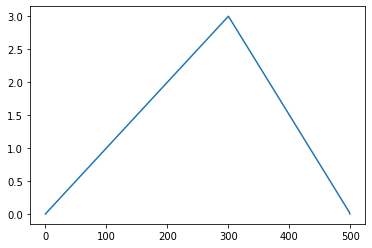

In [732]:
string = String(150, a)
StrMat, EnergyPot, EnergyKin = string.Update(5000, 500)

In [733]:
string = String(150, Spike(500, 3, 300))

In [734]:
mat, _, _ = string.Update(5000, 500)

In [736]:
import random

In [752]:
random.randint(0, 200)

177

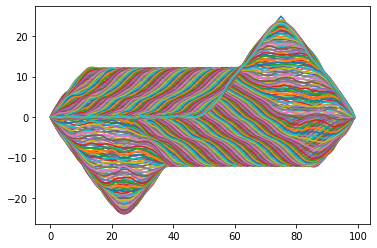

In [381]:
for i in range(500):
    plt.plot(StrMat[i* 4])
    

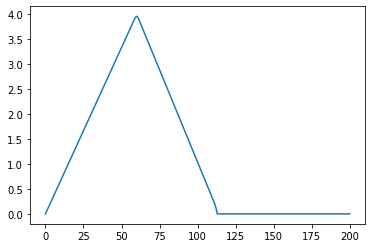

In [783]:
plt.plot(X[110, :, 0])

In [39]:
string.velArray.shape

(98,)

In [40]:
string.accArray.shape

(99,)

In [49]:
string.Derivative(string.array)[1:].shape

(98,)